In [2]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Solver import chebyshev_shifted, plot_graphics, print_table, solve_examples

In [4]:
def example_6_problem():
    """
    Example 6: y(t) = sin(t + 1) - sin(1/e + t) + 1/3 * integral
    Exact solution: y(t) = sin(t + 1/e)
    """
    def nonlinear_function(cos_t, s_j_tensor, y_s):
        return ((cos_t * np.sin(1 + s_j_tensor)) / (y_s)**(1/6))
    
    def exact_solution(t):
        return np.sin(t + 1/np.e)
    return nonlinear_function, exact_solution


def cheb6(t_array):
    is_scalar = np.isscalar(t_array)
    t = np.atleast_1d(t_array)
    results = np.zeros_like(t)
    for i, t_val in enumerate(t):
        T0 = chebyshev_shifted(t_val, 0)
        T1 = chebyshev_shifted(t_val, 1)
        T2 = chebyshev_shifted(t_val, 2)
        T3 = chebyshev_shifted(t_val, 3)
        T4 = chebyshev_shifted(t_val, 4)
        T5 = chebyshev_shifted(t_val, 5)
        T6 = chebyshev_shifted(t_val, 6)
        T7 = chebyshev_shifted(t_val, 7)
        T8 = chebyshev_shifted(t_val, 8)
        T9 = chebyshev_shifted(t_val, 9)
        denominator = (1.16453236*T0 - 2.09408175e-1*T1 + 6.34752789e-2*T2 - 1.39937124e-2*T3 + 3.87150946e-3*T4 - 1.05562873e-3*T5 + 3.00894596e-4*T6 - 8.72238374e-5*T7 + 2.75027789e-5*T8- 7.45294773e-6*T9)**np.e
        results[i] = 1.0 / denominator
    return results[0] if is_scalar else results


--- Solving Example 6 ---


  0%|          | 0/1000 [00:00<?, ?it/s]

Loss = 2.4369074198e-07: 100%|██████████| 1000/1000 [03:46<00:00,  4.41it/s]


Starting L-BFGS optimization...
Training completed in 227.16 seconds
Final Loss: 2.4314558011e-07


Using features ['x0']
Compiling Julia backend...


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           76     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43146D-07    |proj g|=  1.09190D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   76      0      1      0     0     0   1.092D-07   2.431D-07
  F =   2.4314558010514020E-007

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
[ Info: Started!



Expressions evaluated per second: 5.770e+04
Progress: 593 / 800 total iterations (74.125%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.578e-02  3.604e+01  y = x0
2           3.457e-02  6.433e-01  y = 0.73094
4           1.245e-02  5.107e-01  y = x0 + 0.23094
5           1.505e-22  3.604e+01  y = sin(x0 + 0.36788)
8           5.221e-23  3.530e-01  y = sin((x0 * 1) + 0.36788)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           

[ Info: Final population:
[ Info: Results saved to:



Symbolic Approximation:
y(t) = \sin{\left(x_{0} + x_{0} - \left(x_{0} + e^{\left(x_{0} + x_{0}\right) \left(x_{0} - 0.29267077980707457 - -0.1395142560736156\right)} \left(x_{0} \cdot 0.7353782964660422 + x_{0} - 0.7521801732699136 - 0.08241782169022062\right) \left(-2.2483014521033472 \cdot 10^{-11}\right) - 1.256449666819528\right) - 0.8885702255864292 \right)}


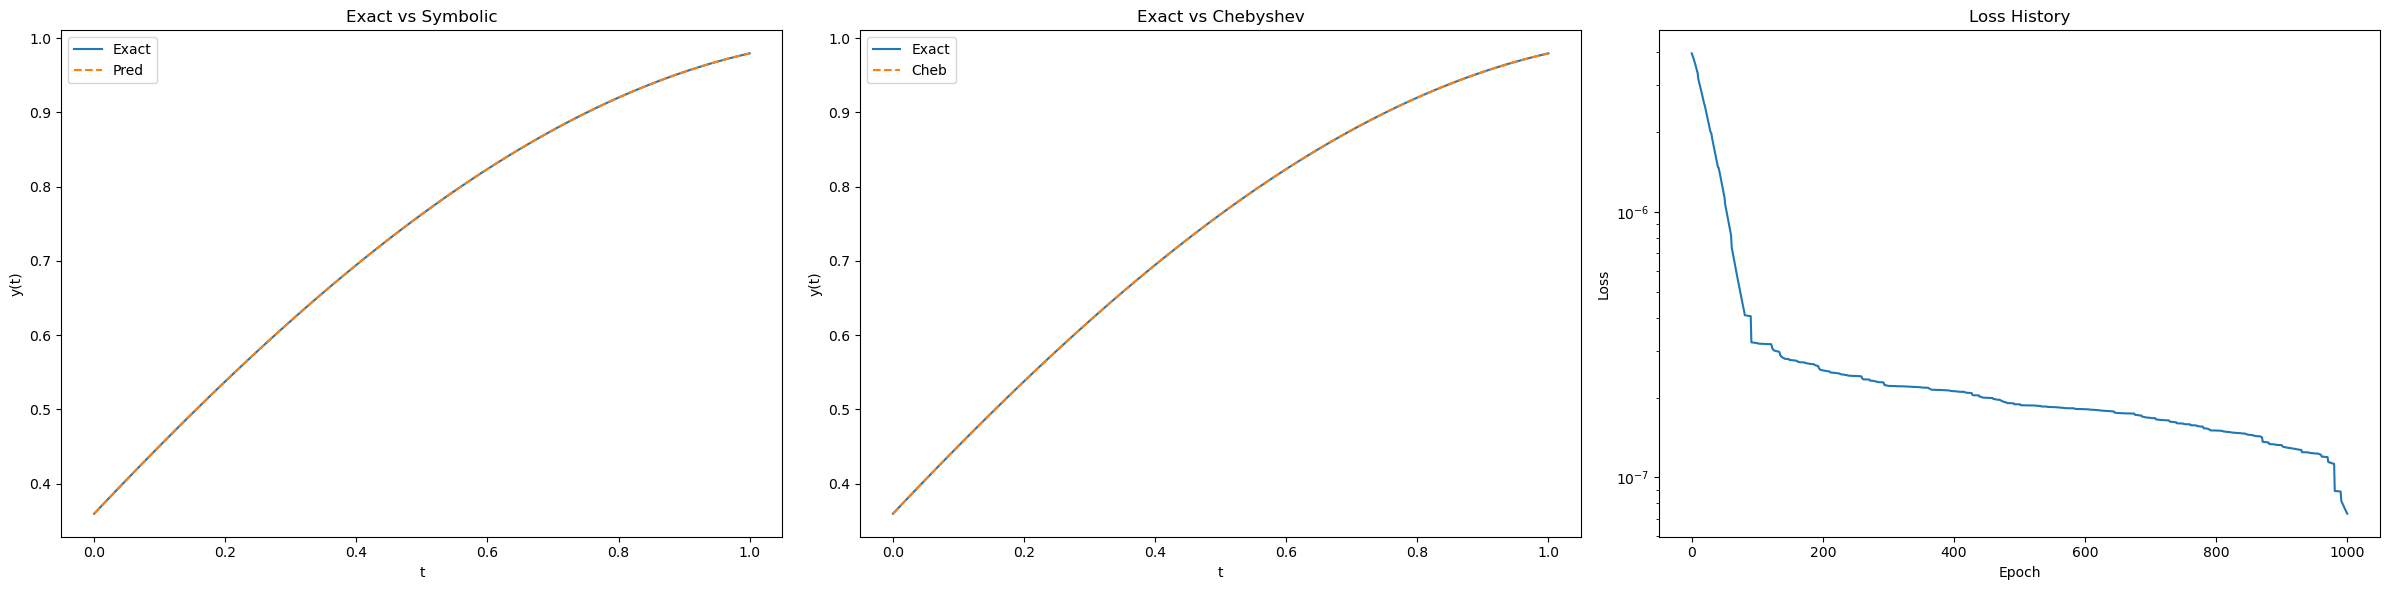

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|t	 |Exact				 |Symbolic			 |Sym Abs err			 |Chebyshev			|Cheb Abs err		 |Win|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.0	 |0.35963756541249558563 	 |0.35963756545251790442 	 |0.00000000004002231879	 |0.35963798742380476137 	|0.00000042201130917574	 |Yes|
|0.1	 |0.45189595737546611742 	 |0.45189595741738330936 	 |0.00000000004191719194	 |0.45099693206063451445 	|0.00089902531483160297	 |Yes|
|0.2	 |0.53954755552184308076 	 |0.53954755556441014175 	 |0.00000000004256706099	 |0.53784096147770976692 	|0.00170659404413331384	 |Yes|
|0.3	 |0.62169880717923631241 	 |0.62169880722157555564 	 |0.00000000004233924322	 |0.61932853428844181209 	|0.00237027289079450032	 |Yes|
|0.4	 |0.69751223223306646481 	

In [5]:
res = solve_examples(example_6_problem, idx="6", num_operator=["sin","exp"])
plot_graphics(res, 6, cheb6)
print_table(cheb6, res, 6)

$$y(t) = \sin{\left(2t - \left(t + e^{\left(2t\right) \left(t - 0.29267 - -0.1395\right)} \left(t \cdot 0.7353 + t - 0.7521 - 0.08241\right) \left(-2.2483 \cdot 10^{-11}\right) - 1.2564\right) - 0.8885 \right)}$$